https://replit.com/@VishnuTR/boilerplate-medical-data-visualizer-1#main.py

In [51]:
import os
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# Import data
df = pd.read_csv('C:/Users/91740/Downloads/medical_examination.csv')
df.head(5)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
#calculated bmi value
df['overweight'] = (df['weight'] / (df['height']/100)**2)
df['overweight']

0        21.967120
1        34.927679
2        23.507805
3        28.710479
4        23.011177
           ...    
69995    26.927438
69996    50.472681
69997    31.353579
69998    27.099251
69999    24.913495
Name: overweight, Length: 70000, dtype: float64

In [8]:
#using lambda fucntion fix the values of df['overweight'] either 1 or 0 based on the condition
df['overweight'] = (df['weight'] / (df['height']/100)**2).apply(lambda x: 1 if x > 25 else 0)
df['overweight']

0        0
1        1
2        0
3        1
4        0
        ..
69995    1
69996    1
69997    1
69998    1
69999    0
Name: overweight, Length: 70000, dtype: int64

https://www.geeksforgeeks.org/how-to-use-if-else-elif-in-python-lambda-functions/#:~:text=Using%20if%2Delse%20in%20lambda%20function&text=Here%2C%20if%20block%20will%20be,when%20the%20condition%20is%20false.&text=Here%2C%20the%20lambda%20function%20will,if%20the%20condition%20is%20false.

In [10]:
# Normalize data by making 0 always good and 1 always bad. 
#If the value of 'cholestorol' or 'gluc' is 1, make the value 0. 
#If the value is more than 1, make the value 1.
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)

In [12]:
#reformated data
df.head(5)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0


In [18]:
# Draw Categorical Plot
#def used for replit purpose only
#otherwise not required
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
df_cat = pd.melt(df, id_vars = 'cardio', var_name = 'variable', value_vars = ['alco', 'active','cholesterol', 'gluc', 'weight','smoke'])

In [25]:
df_cat = pd.melt(df, id_vars = 'cardio', var_name = 'variable', value_vars = ['alco', 'active','cholesterol', 'gluc', 'weight','smoke'])

In [26]:
df_cat

,cardio,variable,value
0,0,alco,0.0
1,1,alco,0.0
2,1,alco,0.0
3,1,alco,0.0
4,0,alco,0.0
...,...,...,...
419995,0,smoke,1.0
419996,1,smoke,0.0
419997,1,smoke,0.0
419998,1,smoke,0.0


In [38]:
df_cat = pd.melt(df, id_vars = 'cardio', var_name = 'variable', value_vars = ['active','alco','cholesterol', 'gluc','smoke'])

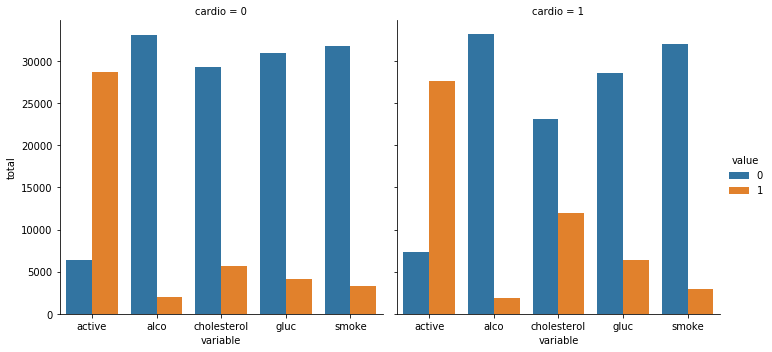

In [39]:
# Draw the catplot with 'sns.catplot()'
fig = sns.catplot(data=df_cat, kind="count",  x="variable",hue="value", col="cardio").set_axis_labels("variable", "total")
fig = fig.fig

In [41]:
# Do not modify the next two lines
fig.savefig('catplot.png')
#return used because of def
#otherwise not required
return fig

In [42]:
# Draw Heat Map
def draw_heat_map():

In [44]:
# Clean the data
df_heat = df[(df['ap_lo']<=df['ap_hi']) &
    (df['height'] >= df['height'].quantile(0.025))&
    (df['height'] <= df['height'].quantile(0.975))&
    (df['weight'] >= df['weight'].quantile(0.025))&
    (df['weight'] <= df['weight'].quantile(0.975))
    ]

In [47]:
# Calculate the correlation matrix
corr = df_heat.corr()
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241
sex,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345


In [48]:
# Generate a mask for the upper triangle
mask = np.triu(corr)
mask

array([[ 1.00000000e+00,  2.50729691e-03,  3.42610273e-03,
         3.25916709e-04,  1.49333224e-04,  3.49238023e-03,
         4.83670793e-04,  3.71939143e-03,  2.28909034e-03,
        -2.73227725e-03, -7.08059804e-04,  5.89114223e-03,
         3.90011059e-03],
       [ 0.00000000e+00,  1.00000000e+00, -1.81320052e-02,
        -7.69318347e-02,  7.01683896e-02,  1.86894095e-02,
         1.53507973e-01,  1.29996176e-01,  8.69901449e-02,
        -4.43706471e-02, -2.69695382e-02, -1.14451266e-02,
         2.40241089e-01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         5.05784851e-01,  1.29979320e-01,  5.06250408e-03,
         5.99466484e-02, -3.76050443e-02, -2.13573847e-02,
         3.37435881e-01,  1.68637124e-01,  7.86370242e-03,
         2.31999158e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  2.51502865e-01,  4.58573625e-03,
         1.79224331e-02, -6.35217890e-02, -3.04690159e-02,
         1.87829575e-01,  8.97850523e

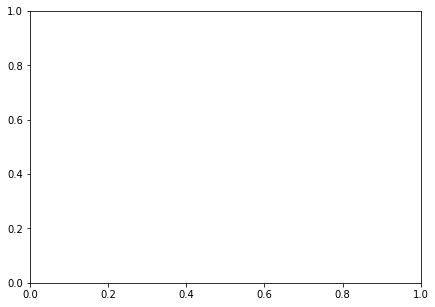

In [49]:
 # Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(7, 5))

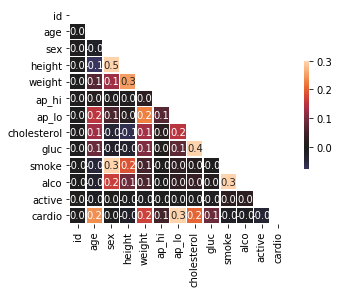

In [50]:
# Draw the heatmap with 'sns.heatmap()'
sns.heatmap(corr,mask=mask, fmt='.1f',vmax=.3, linewidths=.5,square=True, cbar_kws = {'shrink':0.5},annot=True, center=0)